### note: This is not my work, I copied the code to test it on my computer

However I think is a good reference. 

One idea I have in to see if we could use transfer learning and test this code data from my workplace?

Note the this code is using **raw data** as input 

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('SNBQT/raw'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

SNBQT/raw\B007_1_123.mat
SNBQT/raw\B014_1_190.mat
SNBQT/raw\B021_1_227.mat
SNBQT/raw\IR007_1_110.mat
SNBQT/raw\IR014_1_175.mat
SNBQT/raw\IR021_1_214.mat
SNBQT/raw\OR007_6_1_136.mat
SNBQT/raw\OR014_6_1_202.mat
SNBQT/raw\OR021_6_1_239.mat
SNBQT/raw\Time_Normal_1_098.mat


### Fault type identification
There are 10 types of faults, linked to each bearing deffect:

Ball_007_1: Ball defect (0.007 inch) <br>
Ball_014_1: Ball defect (0.014 inch) <br>
Ball_021_1: Ball defect (0.021 inch) <br>
IR_007_1: Inner race fault (0.007 inch) <br>
IR_014_1: Inner race fault (0.014 inch) <br>
IR_021_1: Inner race fault (0.021 inch) <br>
Normal_1: Normal <br>
OR_007_6_1: Outer race fault (0.007 inch, data collected from 6 O'clock position) <br>
OR_014_6_1: Outer race fault (0.014 inch, 6 O'clock) <br>
OR_021_6_1: Outer race fault (0.021 inch, 6 O'clock) <br>

In [12]:
data_time = pd.read_csv("SNBQT/feature_time_48k_2048_load_1.csv")
data_time

max      min      mean        sd       rms  skewness  kurtosis  \
0     0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1     0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699 -0.081548   
2     0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339 -0.274069   
3     0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266  0.134692   
4     0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534  0.402783   
...       ...      ...       ...       ...       ...       ...       ...   
2295  0.21425 -0.19839  0.010769  0.064100  0.064983 -0.212497 -0.119312   
2296  0.21967 -0.20882  0.013136  0.068654  0.069883 -0.061308 -0.295122   
2297  0.20799 -0.21613  0.012571  0.067128  0.068279 -0.154754 -0.071405   
2298  0.21425 -0.22405  0.012608  0.066813  0.067977 -0.326966  0.023662   
2299  0.19610 -0.24721  0.012209  0.063243  0.064396 -0.351762  0.226294   

         crest      form       fault  
0     2.901946  6.950855  Ball_007_1  
1     3.482334  6.035202  Ball_007_1  
2     3.102819  7.376926  Ball_007_1  
3     3.691097  7.558387  Ball_007_1  
4     3.193561  6.312085  Ball_007_1  
...        ...       ...         ...  
2295  3.297037  6.034174    Normal_1  
2296  3.143410  5.319958    Normal_1  
2297  3.046161  5.431299    Normal_1  
2298  3.151821  5.391672    Normal_1  
2299  3.045244  5.274392    Normal_1  

[2300 rows x 10 columns]

### Split into train and test datasets

In [13]:
train_data, test_data = train_test_split(data_time, test_size = 750, stratify = data_time['fault'], random_state = 1234)
test_data['fault'].value_counts()

Ball_007_1    75
IR_007_1      75
OR_021_6_1    75
Normal_1      75
IR_014_1      75
Ball_014_1    75
OR_014_6_1    75
IR_021_1      75
Ball_021_1    75
OR_007_6_1    75
Name: fault, dtype: int64

### Scale features in train set

In [14]:
# Scale each column to have zero mean and standard deviation equal to 1
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])
pd.DataFrame(train_data_scaled).describe()

0             1             2             3             4  \
count  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03   
mean   1.287859e-16  1.065098e-16  1.738215e-16  1.775641e-16  2.111573e-16   
std    1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00   
min   -8.877055e-01 -2.951564e+00 -1.935376e+00 -9.258092e-01 -9.231913e-01   
25%   -7.088474e-01 -3.753614e-01 -6.908706e-01 -6.755048e-01 -6.760659e-01   
50%   -4.958143e-01  5.113022e-01 -3.141526e-01 -5.055027e-01 -5.038108e-01   
75%    4.477234e-01  7.003484e-01  4.560105e-01  7.015641e-01  7.003255e-01   
max    3.297226e+00  8.671141e-01  3.503861e+00  2.980548e+00  2.981995e+00   

                  5             6             7             8  
count  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03  
mean   2.613501e-17 -1.719055e-18  6.981870e-16  3.380808e-17  
std    1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00  
min   -5.951422e+00 -7.874742e-01 -1.481163e+00 -7.775653e-01  
25%   -3.678525e-01 -6.073122e-01 -8.064817e-01 -6.475107e-01  
50%    2.140248e-01 -4.182916e-01 -2.135605e-01 -4.548003e-01  
75%    5.823124e-01  2.860828e-01  5.648177e-01  4.360429e-01  
max    4.906756e+00  6.349353e+00  4.049712e+00  9.629399e+00

In [15]:
test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
pd.DataFrame(test_data_scaled).describe()

0           1           2           3           4           5  \
count  750.000000  750.000000  750.000000  750.000000  750.000000  750.000000   
mean    -0.013718    0.003277   -0.018151   -0.013327   -0.013375   -0.035946   
std      0.976752    0.993896    1.003708    0.987301    0.987315    1.105931   
min     -0.895968   -2.754539   -1.590184   -0.922087   -0.922953   -6.014935   
25%     -0.706453   -0.429163   -0.720867   -0.677965   -0.678545   -0.355683   
50%     -0.494044    0.503185   -0.303458   -0.492809   -0.490457    0.224657   
75%      0.394936    0.704214    0.401811    0.669274    0.667916    0.576534   
max      3.008545    0.861398    3.003971    2.885914    2.887282    6.301407   

                6           7           8  
count  750.000000  750.000000  750.000000  
mean     0.018838    0.009379   -0.012433  
std      1.028360    0.998996    0.936491  
min     -0.759377   -1.515700   -0.772309  
25%     -0.606352   -0.762882   -0.641796  
50%     -0.415267   -0.219297   -0.452940  
75%      0.294171    0.547845    0.447909  
max      5.007205    3.784107    3.531440

### Train a model using Support Vector Classifier

In [16]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(train_data_scaled, train_data['fault'])

SVC()

Model Evaluation
Now get predictions from the model and create a confusion matrix and a classification report.

In [17]:
train_predictions = svc_model.predict(train_data_scaled)
test_predictions = svc_model.predict(test_data_scaled)


In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
# Plot confusion matrixes.

train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

<ipython-input-20-4abbe6b2ce03>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)


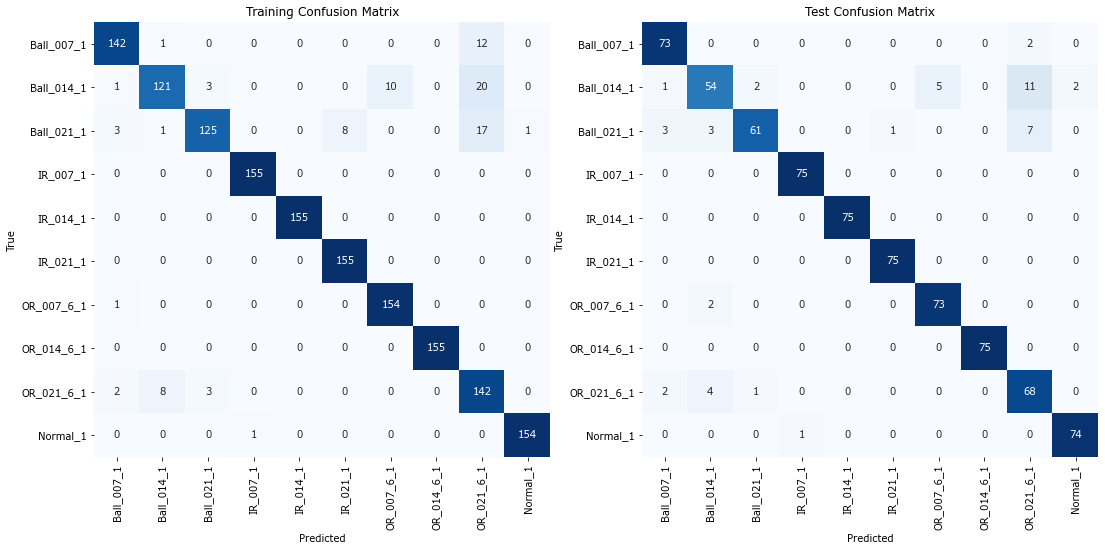

In [20]:
fault_type = data_time.fault.unique()

plt.figure(1,figsize=(18,8))

plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)

plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [21]:
# Classification report (test set)
class_report = classification_report(y_pred = test_predictions, y_true = test_data['fault'])
print(class_report)

              precision    recall  f1-score   support

  Ball_007_1       0.92      0.97      0.95        75
  Ball_014_1       0.86      0.72      0.78        75
  Ball_021_1       0.95      0.81      0.88        75
    IR_007_1       0.99      1.00      0.99        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       0.99      1.00      0.99        75
    Normal_1       0.94      0.97      0.95        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.77      0.91      0.83        75
  OR_021_6_1       0.97      0.99      0.98        75

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



### Tuning hyperparameters for model optimization

We will check a grid of parameters to find the best one. For each parameter combination, 10 fold cross-validation is performed.

In [22]:
parameters = {"C":[1, 10, 45, 47,49, 50, 51, 55, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [23]:
# Define the Grid Search optimization analysis
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)
tuned_svm_clf

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 45, 47, 49, 50, 51, 55, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [24]:
# Train the move for the every pair of hyperparameters,
#   and determine the best combination
tuned_svm_clf.fit(train_data_scaled, train_data['fault'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 45, 47, 49, 50, 51, 55, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [25]:
# Hyperparameter of the best model
tuned_svm_clf.best_params_

{'C': 55, 'gamma': 0.05, 'kernel': 'rbf'}

In [26]:
#Let's select the best model and provide results on them
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=55, gamma=0.05)

## Best model evaluation

In [28]:
# Compute the predictions
train_predictions_best = best_clf.predict(train_data_scaled)
test_predictions_best = best_clf.predict(test_data_scaled)

In [29]:
# Compute confusion matrix for training and test datasets
train_confu_matrix_best = confusion_matrix(train_data['fault'], train_predictions_best)
test_confu_matrix_best = confusion_matrix(test_data['fault'], test_predictions_best)

<ipython-input-30-a892dbf02f7f>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)


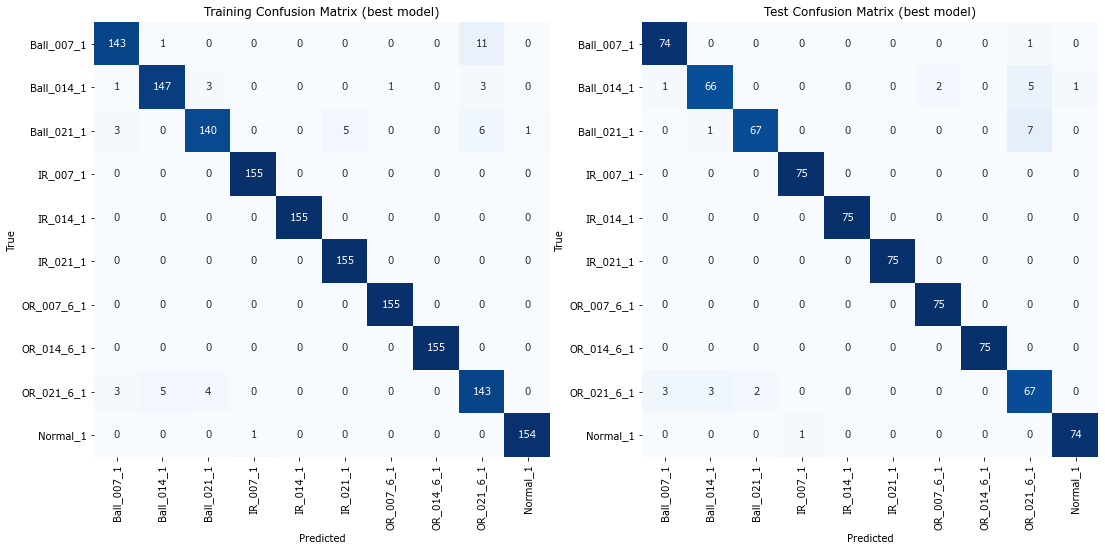

In [30]:
plt.figure(1,figsize=(18,8))

plt.subplot(121)
sns.heatmap(train_confu_matrix_best, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (best model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)

plt.subplot(122)
sns.heatmap(test_confu_matrix_best, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (best model)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

Compare with non optimized versions

In [31]:
# Classification report (test set)
class_report_best = classification_report(y_pred = test_predictions_best, y_true = test_data['fault'])
print(class_report_best)

              precision    recall  f1-score   support

  Ball_007_1       0.95      0.99      0.97        75
  Ball_014_1       0.94      0.88      0.91        75
  Ball_021_1       0.97      0.89      0.93        75
    IR_007_1       0.99      1.00      0.99        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       1.00      1.00      1.00        75
    Normal_1       0.97      1.00      0.99        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.84      0.89      0.86        75
  OR_021_6_1       0.99      0.99      0.99        75

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



In [32]:
# Remember the metrics for the non-optimized model
print(class_report)

              precision    recall  f1-score   support

  Ball_007_1       0.92      0.97      0.95        75
  Ball_014_1       0.86      0.72      0.78        75
  Ball_021_1       0.95      0.81      0.88        75
    IR_007_1       0.99      1.00      0.99        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       0.99      1.00      0.99        75
    Normal_1       0.94      0.97      0.95        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.77      0.91      0.83        75
  OR_021_6_1       0.97      0.99      0.98        75

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



## Multinomial logistic regression
This is the alternative model for comparing with SVC performance

In [33]:
# Logistic regression classifier
from sklearn.linear_model import LogisticRegression

# Setup the model
logis_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
logis_model.fit(train_data_scaled, train_data['fault'])

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [34]:
# Compute the predictions
test_predictions_lr = logis_model.predict(test_data_scaled)

In [35]:
# Compute confusion matrix 
test_confu_matrix_lr = confusion_matrix(test_data['fault'], test_predictions_lr)

In [36]:
# Classification report
class_report_lr = classification_report(y_pred = test_predictions_lr, y_true = test_data['fault'])
print(class_report_lr)

              precision    recall  f1-score   support

  Ball_007_1       0.91      1.00      0.96        75
  Ball_014_1       0.83      0.77      0.80        75
  Ball_021_1       0.92      0.88      0.90        75
    IR_007_1       0.99      1.00      0.99        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       0.99      1.00      0.99        75
    Normal_1       0.94      0.97      0.95        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.86      0.81      0.84        75
  OR_021_6_1       0.99      0.99      0.99        75

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



In [37]:
# Compute the predictions
train_predictions_logis = logis_model.predict(train_data_scaled)
test_predictions_logis = logis_model.predict(test_data_scaled)

In [38]:
# Classification report (test set)
class_report_logis = classification_report(y_pred = test_predictions_logis, y_true = test_data['fault'])
print(class_report_logis)

              precision    recall  f1-score   support

  Ball_007_1       0.91      1.00      0.96        75
  Ball_014_1       0.83      0.77      0.80        75
  Ball_021_1       0.92      0.88      0.90        75
    IR_007_1       0.99      1.00      0.99        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       0.99      1.00      0.99        75
    Normal_1       0.94      0.97      0.95        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.86      0.81      0.84        75
  OR_021_6_1       0.99      0.99      0.99        75

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



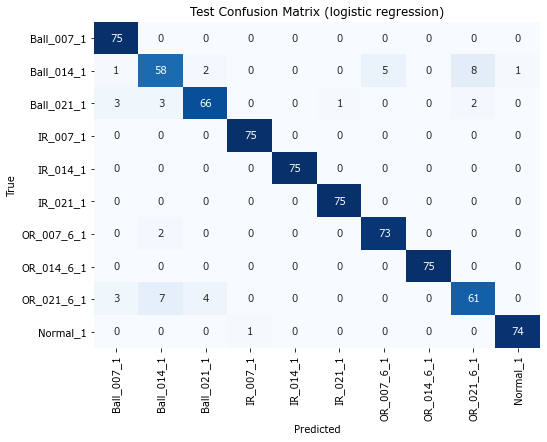

In [39]:
plt.figure(1,figsize=(8,6))

sns.heatmap(test_confu_matrix_lr, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (logistic regression)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()